In [1]:
#!pip install wfdb
#!pip install pandas_profiling
#!pip install --upgrade matplotlib

In [5]:
import pandas as pd
import numpy as np
import wfdb
import os
import pandas_profiling as pp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [6]:
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 
%matplotlib inline

In [4]:
data_files = ["data/" + file for file in os.listdir("data") if ".dat" in file]

In [5]:
def read_file(file, participant):
    """Utility function
    """
    # Get signal
    data = pd.DataFrame({wfdb.rdsamp(file[:-4])[1]['sig_name'][0]: wfdb.rdsamp(file[:-4])[0][:, 0],wfdb.rdsamp(file[:-4])[1]['sig_name'][1]: wfdb.rdsamp(file[:-4])[0][:, 1]})
    data["Sample"] = range(len(data))
    anno = wfdb.rdann(file[:-4], 'atr')
    anno = pd.DataFrame({"Rpeaks": anno.sample,"type": anno.symbol})
    return data, anno

In [6]:

name=100
for participant, file in enumerate(data_files):
    ecg = []
    rpeaks = []

    print("Participant: " + str(participant + 1) + "/" + str(len(data_files)))

    data, anno = read_file(file, participant)

    # Store with the rest
    ecg.append(data)
    rpeaks.append(anno)

    # Store additional recording if available
    if "x_" + file.replace("data/", "") in os.listdir("data/x_mitdb/"):
        print("  - Additional recording detected.")
        data, anno = read_file("data/x_mitdb/" + "x_" + file.replace("data/", ""), participant)
        # Store with the rest
        ecg.append(data)
        rpeaks.append(anno)
   
    ecg = pd.concat(ecg).to_csv(str(name)+".csv", index=False,header=["MLII", "V5", "Sample"])
    rpeaks = pd.concat(rpeaks).to_csv(str(name)+"Rpeaks.csv", index=False)

    name=name+1

# Save
#df_ecg = pd.concat(dfs_ecg).to_csv("ECGs.csv", index=False)
#df_rpeaks = pd.concat(dfs_rpeaks).to_csv("Rpeaks.csv", index=False)
print('wslat')

Participant: 1/48
Participant: 2/48
Participant: 3/48
Participant: 4/48
Participant: 5/48
Participant: 6/48
Participant: 7/48
Participant: 8/48
Participant: 9/48
  - Additional recording detected.
Participant: 10/48
  - Additional recording detected.
Participant: 11/48
  - Additional recording detected.
Participant: 12/48
  - Additional recording detected.
Participant: 13/48
  - Additional recording detected.
Participant: 14/48
  - Additional recording detected.
Participant: 15/48
  - Additional recording detected.
Participant: 16/48
  - Additional recording detected.
Participant: 17/48
  - Additional recording detected.
Participant: 18/48
Participant: 19/48
Participant: 20/48
  - Additional recording detected.
Participant: 21/48
  - Additional recording detected.
Participant: 22/48
  - Additional recording detected.
Participant: 23/48
  - Additional recording detected.
Participant: 24/48
Participant: 25/48
Participant: 26/48
Participant: 27/48
Participant: 28/48
Participant: 29/48
Par

In [387]:
record = pd.read_csv('100.csv')

In [388]:
record.head(20)

,MLII,V5,Sample
0,-0.145,-0.065,0
1,-0.145,-0.065,1
2,-0.145,-0.065,2
3,-0.145,-0.065,3
4,-0.145,-0.065,4
5,-0.145,-0.065,5
6,-0.145,-0.065,6
7,-0.145,-0.065,7
8,-0.120,-0.080,8
9,-0.135,-0.080,9


In [389]:
round(100*(record.isnull().sum()/len(record.index)), 2)

MLII      0.0
V5        0.0
Sample    0.0
dtype: float64

In [390]:
Rpeaks=pd.read_csv('100Rpeaks.csv')

In [391]:
#data analys
Rpeaks['type'].describe()
print(Rpeaks['type'].value_counts()) 

N    2239
A      33
+       1
V       1
Name: type, dtype: int64


In [392]:
Rpeaks.head()

,Rpeaks,type,sampling_rate
0,18,+,18
1,77,N,59
2,370,N,293
3,662,N,292
4,946,N,284


In [393]:
round(100*(Rpeaks.isnull().sum()/len(Rpeaks.index)), 2)

Rpeaks           0.0
type             0.0
sampling_rate    0.0
dtype: float64

PLOT 

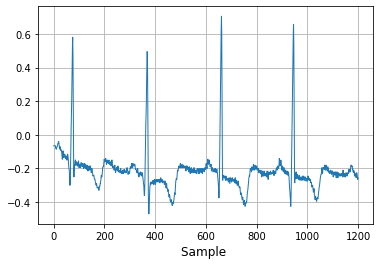

In [394]:
%matplotlib inline
x=record['V5']
nhb=4 #number of heartbeats
lhb=300 #average length of a heartbeat
start=0
end=nhb*lhb 

X=x[start:end].values
ecg=(X)
ecg=np.transpose(ecg)
fs=360 #1 sec of signal
ts=1/fs
t=np.linspace(0, np.size(ecg), np.size(ecg))
times=t*ts

where = Rpeaks['Rpeaks'].values <end
samp = Rpeaks['Rpeaks'].values[where]

types = np.array(Rpeaks['type'].values)
types = types[where]

plt.plot(t, ecg)

    
    
# Get the annotation position

    # Use just the first letter 


plt.xlabel('Sample ', fontsize=12)
plt.show()

Pre-processing


In [395]:
#Normalize_all_data()
def Normalize_all_data(file):
    df = pd.read_csv(str(file) + '.csv')
    df['MLII'] = (df['MLII'] - df.describe()['MLII']['min'])/(df.describe()['MLII']['max']-df.describe()['MLII']['min'])
    df['V5'] = (df['V5'] - df.describe()['V5']['min'])/(df.describe()['V5']['max']-df.describe()['V5']['min'])
    file = file + 1 
    return df

Normalization 

In [397]:
df=Normalize_all_data(100)

In [399]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

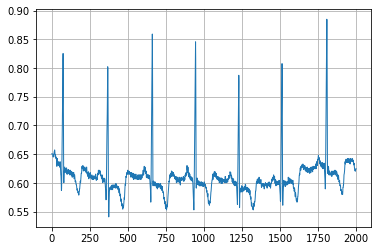

In [348]:
df["V5"][0:2000].plot()

# filtering

In [406]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# read ECG data from the WAV file
#sampleRate, data = scipy.io.wavfile.read('ecg.wav')
sampleRate=360
times = np.arange(len(df["V5"]))/sampleRate

# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.1)
#filtered = scipy.signal.filtfilt(b, a, df["V5"])
df["V5"]=scipy.signal.filtfilt(b, a, df["V5"])
df["MLII"]=scipy.signal.filtfilt(b, a, df["MLII"])

In [407]:
df["V5"]

0         0.650083
1         0.649726
2         0.649384
3         0.649076
4         0.648819
            ...   
649995    0.673418
649996    0.667284
649997    0.662170
649998    0.658072
649999    0.654871
Name: V5, Length: 650000, dtype: float64

In [350]:
filtered[0:100]

array([0.65019323, 0.6498799 , 0.64956221, 0.6492427 , 0.64893037,
       0.64864141, 0.64839886, 0.64823076, 0.64816657, 0.64823215,
       0.64844401, 0.64880421, 0.64929734, 0.64989014, 0.65053394,
       0.65116913, 0.65173114, 0.65215732, 0.65239387, 0.65240196,
       0.65216172, 0.65167342, 0.65095503, 0.65003688, 0.64895545,
       0.64774838, 0.64645217, 0.64510186, 0.64373166, 0.64237532,
       0.64106624, 0.63983685, 0.63871731, 0.63773272, 0.63689958,
       0.63622288, 0.63569609, 0.63530495, 0.63503325, 0.63486723,
       0.63479642, 0.6348112 , 0.63489935, 0.63504304, 0.63521679,
       0.63538548, 0.63550196, 0.63550467, 0.6353169 , 0.63484946,
       0.63400715, 0.63269841, 0.63084782, 0.62841152, 0.62539584,
       0.62187753, 0.61802231, 0.61409622, 0.61046506, 0.60757891,
       0.60594162, 0.60606725, 0.60842653, 0.6133861 , 0.62114528,
       0.6316782 , 0.64469289, 0.65961895, 0.67563045, 0.69170325,
       0.70669992, 0.71947387, 0.72898478, 0.73441672, 0.73528

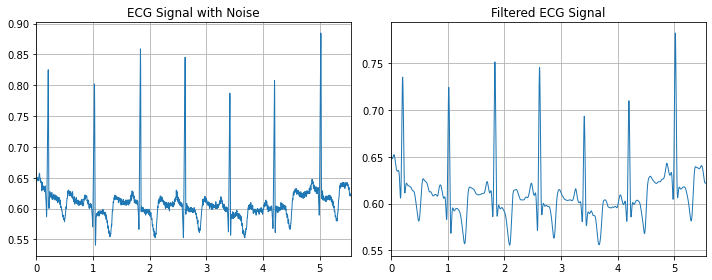

In [351]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times[0:2000], df["V5"][0:2000])
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times[0:2000], filtered[0:2000])
plt.title("Filtered ECG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

In [352]:
Rpeaks101 = pd.read_csv('100Rpeaks.csv')
Rpeaks101.head()

,Rpeaks,type,sampling_rate
0,18,+,18
1,77,N,59
2,370,N,293
3,662,N,292
4,946,N,284


In [353]:
print(len(Rpeaks101))

2274


In [354]:
##RR interval
Rpeaks101["RR_interval"] = np.nan
for i in range(1,len(Rpeaks101)):
    start= Rpeaks101['Rpeaks'][i]
    end= Rpeaks101['Rpeaks'][i-1]
    Rpeaks101['RR_interval'][i]=start-end

print(len(Rpeaks101['RR_interval']))

2274


In [355]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval
0,18,+,18,NaN
1,77,N,59,59.0
2,370,N,293,293.0
3,662,N,292,292.0
4,946,N,284,284.0
...,...,...,...,...
2269,648978,N,245,245.0
2270,649232,N,254,254.0
2271,649484,N,252,252.0
2272,649734,N,250,250.0


In [356]:
#pre-RR
Rpeaks101["pre_RR"] = np.nan
for i in range(2,len(Rpeaks101)):
    start= Rpeaks101['Rpeaks'][i-1]
    end= Rpeaks101['Rpeaks'][i-2]
    Rpeaks101['pre_RR'][i]=start-end

print(len(Rpeaks101['pre_RR']))

2274


In [357]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR
0,18,+,18,NaN,NaN
1,77,N,59,59.0,NaN
2,370,N,293,293.0,59.0
3,662,N,292,292.0,293.0
4,946,N,284,284.0,292.0
...,...,...,...,...,...
2269,648978,N,245,245.0,256.0
2270,649232,N,254,254.0,245.0
2271,649484,N,252,252.0,254.0
2272,649734,N,250,250.0,252.0


In [358]:
#post-RR
Rpeaks101["post_RR"] = np.nan
for i in range(0,len(Rpeaks101)-1):
    start= Rpeaks101['Rpeaks'][i+1]
    end= Rpeaks101['Rpeaks'][i]
    Rpeaks101['post_RR'][i]=start-end

print(len(Rpeaks101['post_RR']))

2274


In [359]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR
0,18,+,18,NaN,NaN,59.0
1,77,N,59,59.0,NaN,293.0
2,370,N,293,293.0,59.0,292.0
3,662,N,292,292.0,293.0,284.0
4,946,N,284,284.0,292.0,285.0
...,...,...,...,...,...,...
2269,648978,N,245,245.0,256.0,254.0
2270,649232,N,254,254.0,245.0,252.0
2271,649484,N,252,252.0,254.0,250.0
2272,649734,N,250,250.0,252.0,257.0


In [360]:
#Diference between RR and pre-RR intervals
Rpeaks101['RR_preRR']=Rpeaks101['RR_interval']-Rpeaks101['pre_RR'] 

In [361]:
#Diference between post-RR and RR intervals
Rpeaks101['postRR_RR']=Rpeaks101['post_RR']-Rpeaks101['RR_interval'] 

In [362]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR
0,18,+,18,NaN,NaN,59.0,NaN,NaN
1,77,N,59,59.0,NaN,293.0,NaN,234.0
2,370,N,293,293.0,59.0,292.0,234.0,-1.0
3,662,N,292,292.0,293.0,284.0,-1.0,-8.0
4,946,N,284,284.0,292.0,285.0,-8.0,1.0
...,...,...,...,...,...,...,...,...
2269,648978,N,245,245.0,256.0,254.0,-11.0,9.0
2270,649232,N,254,254.0,245.0,252.0,9.0,-2.0
2271,649484,N,252,252.0,254.0,250.0,-2.0,-2.0
2272,649734,N,250,250.0,252.0,257.0,-2.0,7.0


### Heart beat segmentation

In [363]:
Rpeaks101["inter_min"] = np.nan
Rpeaks101["inter_max"] = np.nan
for i in range(2,len(Rpeaks101)-2):
    b= Rpeaks101['Rpeaks'][i]
    a= Rpeaks101['Rpeaks'][i-1]
    #[c1,c2] represent the heartbeat interval  
    c1=b-int(abs(0.3*(b-a)))
    c2=int(abs(0.6*(a-b)))+b
    Rpeaks101['inter_min'][i]=c1
    Rpeaks101['inter_max'][i]=c2

In [364]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR,inter_min,inter_max
0,18,+,18,NaN,NaN,59.0,NaN,NaN,NaN,NaN
1,77,N,59,59.0,NaN,293.0,NaN,234.0,NaN,NaN
2,370,N,293,293.0,59.0,292.0,234.0,-1.0,283.0,545.0
3,662,N,292,292.0,293.0,284.0,-1.0,-8.0,575.0,837.0
4,946,N,284,284.0,292.0,285.0,-8.0,1.0,861.0,1116.0
...,...,...,...,...,...,...,...,...,...,...
2269,648978,N,245,245.0,256.0,254.0,-11.0,9.0,648905.0,649125.0
2270,649232,N,254,254.0,245.0,252.0,9.0,-2.0,649156.0,649384.0
2271,649484,N,252,252.0,254.0,250.0,-2.0,-2.0,649409.0,649635.0
2272,649734,N,250,250.0,252.0,257.0,-2.0,7.0,NaN,NaN


### Heartbeat interval visualisation 

### Segmentation of QRS complexes

In [365]:
QRS = []
#Ts=360
#QRS=Pj -(Ts/10) 
a=36
b=36
s= df['V5']
for i in range(2, len(Rpeaks101)-1):
    
    QRS.append(s[(Rpeaks101['Rpeaks'][i]-a):(Rpeaks101['Rpeaks'][i]+b)])


In [366]:
type(QRS[1])


pandas.core.series.Series

### Morphology

In [367]:
x6=[]
x7=[]
x8=[]
for i in range(len(QRS)-1):
    x6.append(pow(QRS[i],2).sum())  # QRS complex energy
    x7.append(abs(QRS[i].max()/QRS[i].where(lambda x: x != 0).min())) #QRS complex polarity
    x8.append(QRS[i].var())  #QRS Variance

x6 = np.array(x6)
x7 = np.array(x7)
x8 = np.array(x8)

In [368]:

x6[0]

27.232405020527167

In [369]:

#Ts=360
#QRS=Pj -(Ts/10) 
a=36
b=36
Rpeaks101["QRS_min"] = np.nan
Rpeaks101["QRS_max"] = np.nan

for i in range(2, len(Rpeaks101)-1):
    Rpeaks101["QRS_min"][i]=Rpeaks101['Rpeaks'][i]-a
    Rpeaks101["QRS_max"][i]=Rpeaks101['Rpeaks'][i]+b
    


In [370]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR,inter_min,inter_max,QRS_min,QRS_max
0,18,+,18,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN
1,77,N,59,59.0,NaN,293.0,NaN,234.0,NaN,NaN,NaN,NaN
2,370,N,293,293.0,59.0,292.0,234.0,-1.0,283.0,545.0,334.0,406.0
3,662,N,292,292.0,293.0,284.0,-1.0,-8.0,575.0,837.0,626.0,698.0
4,946,N,284,284.0,292.0,285.0,-8.0,1.0,861.0,1116.0,910.0,982.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2269,648978,N,245,245.0,256.0,254.0,-11.0,9.0,648905.0,649125.0,648942.0,649014.0
2270,649232,N,254,254.0,245.0,252.0,9.0,-2.0,649156.0,649384.0,649196.0,649268.0
2271,649484,N,252,252.0,254.0,250.0,-2.0,-2.0,649409.0,649635.0,649448.0,649520.0
2272,649734,N,250,250.0,252.0,257.0,-2.0,7.0,NaN,NaN,649698.0,649770.0


In [371]:
Rpeaks101["polarity"] = np.nan
Rpeaks101["energy"] = np.nan
Rpeaks101["variance"] = np.nan

for i in range(2, len(Rpeaks101)-2):
    Rpeaks101["energy"][i]=x6[i-2]
    Rpeaks101["polarity"][i]=x7[i-2]
    Rpeaks101["variance"][i]=x8[i-2]

In [372]:
Rpeaks101

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR,inter_min,inter_max,QRS_min,QRS_max,polarity,energy,variance
0,18,+,18,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77,N,59,59.0,NaN,293.0,NaN,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,370,N,293,293.0,59.0,292.0,234.0,-1.0,283.0,545.0,334.0,406.0,1.483709,27.232405,0.003063
3,662,N,292,292.0,293.0,284.0,-1.0,-8.0,575.0,837.0,626.0,698.0,1.516746,28.260137,0.003952
4,946,N,284,284.0,292.0,285.0,-8.0,1.0,861.0,1116.0,910.0,982.0,1.529412,27.961235,0.003753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,648978,N,245,245.0,256.0,254.0,-11.0,9.0,648905.0,649125.0,648942.0,649014.0,1.443678,29.843747,0.002887
2270,649232,N,254,254.0,245.0,252.0,9.0,-2.0,649156.0,649384.0,649196.0,649268.0,1.413712,28.715284,0.002496
2271,649484,N,252,252.0,254.0,250.0,-2.0,-2.0,649409.0,649635.0,649448.0,649520.0,1.450472,28.808115,0.003370
2272,649734,N,250,250.0,252.0,257.0,-2.0,7.0,NaN,NaN,649698.0,649770.0,NaN,NaN,NaN


In [373]:
round(100*(Rpeaks101.isnull().sum()/len(Rpeaks.index)), 2)

Rpeaks           0.00
type             0.00
sampling_rate    0.00
RR_interval      0.04
pre_RR           0.09
post_RR          0.04
RR_preRR         0.09
postRR_RR        0.09
inter_min        0.18
inter_max        0.18
QRS_min          0.13
QRS_max          0.13
polarity         0.18
energy           0.18
variance         0.18
dtype: float64

# Classification 

In [374]:
dfEcg=df = pd.DataFrame(Rpeaks101)
dfEcg.drop(['inter_min','inter_max','QRS_min','QRS_max'], axis = 1, inplace = True) 
dfEcg = dfEcg.drop(dfEcg.index[[0,1]])
dfEcg = dfEcg.drop(dfEcg.index[[len(dfEcg)-2,len(dfEcg)-1]])
dfEcg = dfEcg.reset_index(level=0)
dfEcg.drop(['index'], axis = 1, inplace = True) 


In [375]:
round(100*(dfEcg.isnull().sum()/len(Rpeaks.index)), 2)

Rpeaks           0.0
type             0.0
sampling_rate    0.0
RR_interval      0.0
pre_RR           0.0
post_RR          0.0
RR_preRR         0.0
postRR_RR        0.0
polarity         0.0
energy           0.0
variance         0.0
dtype: float64

In [376]:
dfEcg['polarity'] = dfEcg['polarity'].fillna(dfEcg['polarity'].mean())#replace nan value with mean
dfEcg['variance'] = dfEcg['variance'].fillna(dfEcg['variance'].mean())#replace nan value with mode

In [377]:
round(100*(dfEcg.isnull().sum()/len(Rpeaks.index)), 2)

Rpeaks           0.0
type             0.0
sampling_rate    0.0
RR_interval      0.0
pre_RR           0.0
post_RR          0.0
RR_preRR         0.0
postRR_RR        0.0
polarity         0.0
energy           0.0
variance         0.0
dtype: float64

In [378]:
dfEcg

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR,polarity,energy,variance
0,370,N,293,293.0,59.0,292.0,234.0,-1.0,1.483709,27.232405,0.003063
1,662,N,292,292.0,293.0,284.0,-1.0,-8.0,1.516746,28.260137,0.003952
2,946,N,284,284.0,292.0,285.0,-8.0,1.0,1.529412,27.961235,0.003753
3,1231,N,285,285.0,284.0,284.0,1.0,-1.0,1.413625,26.589805,0.002152
4,1515,N,284,284.0,285.0,294.0,-1.0,10.0,1.439614,27.261020,0.002554
...,...,...,...,...,...,...,...,...,...,...,...
2265,648477,N,274,274.0,269.0,256.0,5.0,-18.0,1.482843,28.834560,0.003045
2266,648733,N,256,256.0,274.0,245.0,-18.0,-11.0,1.517730,29.253700,0.003976
2267,648978,N,245,245.0,256.0,254.0,-11.0,9.0,1.443678,29.843747,0.002887
2268,649232,N,254,254.0,245.0,252.0,9.0,-2.0,1.413712,28.715284,0.002496


In [379]:
def min_max_scaling(df_norm):
    listdf=['Rpeaks','RR_interval','pre_RR','post_RR','RR_preRR','postRR_RR','polarity','energy','variance']
    # apply min-max scaling
    for column in listdf:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
dfEcg_normalized = min_max_scaling(dfEcg)
dfEcg_normalized

,Rpeaks,type,sampling_rate,RR_interval,pre_RR,post_RR,RR_preRR,postRR_RR,polarity,energy,variance
0,0.000000,N,293,0.479452,0.000000,0.474886,1.000000,0.363905,0.006631,0.490143,0.058245
1,0.000450,N,292,0.474886,0.672414,0.438356,0.343575,0.343195,0.007118,0.527039,0.075241
2,0.000887,N,284,0.438356,0.669540,0.442922,0.324022,0.369822,0.007305,0.516308,0.071437
3,0.001326,N,285,0.442922,0.646552,0.438356,0.349162,0.363905,0.005598,0.467073,0.040815
4,0.001764,N,284,0.438356,0.649425,0.484018,0.343575,0.396450,0.005981,0.491170,0.048506
...,...,...,...,...,...,...,...,...,...,...,...
2265,0.998449,N,274,0.392694,0.603448,0.310502,0.360335,0.313609,0.006618,0.547661,0.057900
2266,0.998843,N,256,0.310502,0.617816,0.260274,0.296089,0.334320,0.007132,0.562709,0.075700
2267,0.999220,N,245,0.260274,0.566092,0.301370,0.315642,0.393491,0.006041,0.583892,0.054880
2268,0.999612,N,254,0.301370,0.534483,0.292237,0.371508,0.360947,0.005599,0.543379,0.047389


In [380]:
X = np.array(dfEcg_normalized.loc[:, dfEcg_normalized.columns != 'type'])
y = np.array(dfEcg_normalized.loc[:, dfEcg_normalized.columns == 'type']).reshape(-1, 1)

# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2, shuffle = True)

In [328]:
#Grid search 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#creat a new KNN model 
Knn2 = KNeighborsClassifier() 
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9760739912403317
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=1)


In [329]:
from sklearn.metrics import accuracy_score
y_grid = grid.predict(X_test)
accuracy_score(y_test,y_grid)

0.9681020733652312

In [330]:
y_grid

array(['N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'V', 'V', 'V', 'V', 'V', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'V', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'V', 'N', 'N', 'V', 'V',
       'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'V', 'V',
       '+', 'N', 'N', 'N', 'V', 'V', 'N', '+', 'V', 'N', 'N', 'V', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N',
       'N', '+', 'N', 'N', 'N', 'N', 'N', 'V', 'V', 'N', 'N', 'N', 'N',
       'N', 'N', 'V', 'N', 'V', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'V', 'N', 'N', 'N',
       'N', 'N', 'V', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'V', 'V', 'V', 'N', 'N', 'N', 'V', 'V', 'N', 'V', 'N',
       '+', 'N', 'N', '+', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'V', 'N', 'N', 'N', 'N', 'V', 'V', 'N', 'N', 'V

In [331]:
from sklearn.metrics import accuracy_score ,classification_report
print(classification_report(y_test,y_grid))

              precision    recall  f1-score   support

           +       0.81      0.68      0.74        38
           N       0.98      0.99      0.98       455
           V       0.98      0.98      0.98       133
           ~       0.00      0.00      0.00         1

    accuracy                           0.97       627
   macro avg       0.69      0.66      0.68       627
weighted avg       0.96      0.97      0.97       627



classification with SVM

In [332]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.9665071770334929


### module accuracy

In [333]:
from sklearn.metrics import accuracy_score ,classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           +       0.95      0.47      0.63        38
           N       0.96      1.00      0.98       455
           V       1.00      1.00      1.00       133
           ~       0.00      0.00      0.00         1

    accuracy                           0.97       627
   macro avg       0.73      0.62      0.65       627
weighted avg       0.96      0.97      0.96       627



### Test the module with new signal

In [381]:
newsignpre = grid.predict(X)
accuracy_score(y,newsignpre)

0.8947136563876652

In [382]:
type(newsignpre)

numpy.ndarray

In [383]:
newsignpre

array(['N', 'N', '~', ..., 'N', '+', 'N'], dtype=object)

In [385]:
unique, counts = np.unique(newsignpre, return_counts=True)

print( np.asarray((unique, counts)))

[['+' 'N' 'V' '~']
 [58 2041 20 151]]
